## GLM model: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

## family parameters: classification: multinomial, binomial; only for numeric prediction, not for classification: quasibinomial, gaussian, gamma, poisson, tweedie

In [1]:
import h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 3 hours 51 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,21 days and 42 minutes
H2O cluster name:,H2O_from_python_yananli_b8uqhw
H2O cluster total nodes:,1
H2O cluster free memory:,1.633 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [3]:
url = "http://coursera.h2o.ai/data/smoking.csv"
smoking = h2o.import_file(url, destination_frame = "smoking")

In [ ]:
smoking.summary()

In [ ]:
smoking[:, "C3"].sum()

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [ ]:
x = [0, 1]
y = 4

In [ ]:
m = H2OGeneralizedLinearEstimator(
    family = "poisson",
    model_id = "smoking_p",
    #nfolds = 12,
    #fold_assignment = "Modulo"
)
m.train(x, y, smoking)

In [ ]:
m.model_performance()

In [ ]:
m.coef()

In [ ]:
m2 = H2OGeneralizedLinearEstimator(
    family = "poisson",
    model_id = "smoking_p2",
)
m2.train("C2", y, smoking)

In [ ]:
m2.model_performance()

In [ ]:
m2.coef()

## Naive Bayes is for classificaton only, cannot be applied to regression: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/naive-bayes.html

In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train, test = iris.split_frame([0.8])

In [6]:
train.summary()

,sepal_len,sepal_wid,petal_len,petal_wid,class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.852,3.0512,3.7528,1.1808,
maxs,7.9,4.2,6.9,2.5,
sigma,0.854645748155,0.436927690186,1.78147166419,0.75804247051,
zeros,0,0,0,0,
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

In [8]:
mNB = H2ONaiveBayesEstimator()
mNB.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"],"class", train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [9]:
mNB

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1578267636222_1


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,3.0,0.328,0.336




ModelMetricsMultinomial: naivebayes
** Reported on train data. **

MSE: 0.0392551074372
RMSE: 0.198129017151
LogLoss: 0.127488999689
Mean Per-Class Error: 0.0563298490128

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,42.0,0.0,0.0,0.000000,0 / 42
1,0.0,39.0,3.0,0.071429,3 / 42
2,0.0,4.0,37.0,0.097561,4 / 41
3,42.0,43.0,40.0,0.056000,7 / 125



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.944
1,2,1.000
2,3,1.000


In [10]:
mNB.model_performance(test)


ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.00249782757975
RMSE: 0.0499782710761
LogLoss: 0.015592223637
Mean Per-Class Error: 0.0

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,8.0,0.0,0.0,0.0,0 / 8
1,0.0,8.0,0.0,0.0,0 / 8
2,0.0,0.0,9.0,0.0,0 / 9
3,8.0,8.0,9.0,0.0,0 / 25



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0


In [11]:
mNB2 = H2ONaiveBayesEstimator(laplace = 2)
mNB2.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"],"class", train)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


In [12]:
mNB2.model_performance(test)


ModelMetricsMultinomial: naivebayes
** Reported on test data. **

MSE: 0.00250167906334
RMSE: 0.0500167878151
LogLoss: 0.0156019805615
Mean Per-Class Error: 0.0

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
0,8.0,0.0,0.0,0.0,0 / 8
1,0.0,8.0,0.0,0.0,0 / 8
2,0.0,0.0,9.0,0.0,0 / 9
3,8.0,8.0,9.0,0.0,0 / 25



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0


## Load and save models

In [ ]:
fname = h2o.save_model(m, "/path/to/")
m = h2o.load_model("/path/to/someid")

## Some data manipulation: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging.html

In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
data.summary()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5,1.40909090909,14.6010732639,3.82061485288,1345.84666138,1313.22286143,1504.63413038,1485.28916731,,818.842989677,,124.814529135,125.021562607,114.316111091,9.31711193698,10.0073906556,,,730.182190565,5.38136805953,14.1686341847,0.0246941652645,,0.00247851198326,4.04780029106,0.289376469271,4.85503190418,0.0170155602821,7.62006045002,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.34436090171,1.87471137134,9.17579042586,1.90501311913,465.340899124,476.251139993,484.347487904,492.750434123,,777.404369164,,73.9744416606,73.40159463,69.6363295151,29.8402219624,26.4388090429,,,578.43800823,4.20197993986,9.9050857472,0.155193141358,,0.0497234872189,16.2057299045,4.41677989873,18.6197762215,0.403940182102,23.4875658741,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [ ]:
# data["xxx"] = data["xxx"].asfactor()
# data["xxx"] = data["xxx"].asnumeric()

In [15]:
data["AirTime"].mean()

[114.31611109078231]

In [16]:
data["AirTime"].summary()

,AirTime
type,int
mins,14.0
mean,114.316111091
maxs,402.0
sigma,69.6363295151
zeros,0
missing,16649
0,nan
1,nan
2,nan


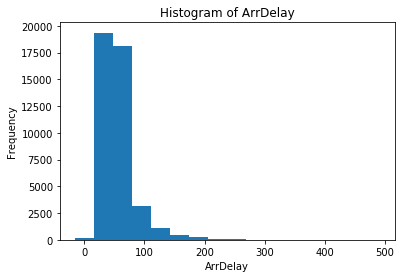

In [19]:
data["ArrDelay"].hist()

In [24]:
(data["ArrDelay"] > 360).any()

True

In [32]:
(data["ArrDelay"] < 480).all() ### have to remove NA

False

In [33]:
data["UniqueCarrier"].grep("[C-E]")

C1
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000


In [35]:
data["UniqueCarrier"][data["UniqueCarrier"].grep("[C-E]",output_logical = True)]

UniqueCarrier
DL
DL
DL
DL
DL
DL
DL
DL
DL
DL


In [37]:
data[["ArrDelay", "DepDelay", "AirTime"]].cor(na_rm = True)

ArrDelay0,DepDelay0,AirTime0
1,0.907564,0.0836881
0.907564,1,0.0619647
0.0836881,0.0619647,1


In [5]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [6]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

35255/4272/4451


In [7]:
train2 = data[1:train.nrows, :]
train2 = h2o.assign(train2, "first35255")

In [8]:
h2o.ls() # check all dataset in H2O

,key
0,GLM_model_python_1578267636222_3
1,Grid_GLM_py_40_sid_80fa_model_python_157826763...
2,Grid_GLM_py_40_sid_80fa_model_python_157826763...
3,Grid_GLM_py_40_sid_80fa_model_python_157826763...
4,Grid_GLM_py_40_sid_80fa_model_python_157826763...
5,Grid_GLM_py_40_sid_80fa_model_python_157826763...
6,Grid_GLM_py_40_sid_80fa_model_python_157826763...
7,Grid_GLM_py_40_sid_80fa_model_python_157826763...
8,Grid_GLM_py_40_sid_80fa_model_python_157826763...
9,Grid_GLM_py_40_sid_80fa_model_python_157826763...


In [9]:
data.ncol

31

In [10]:
dates = data[:, 0:4]

In [11]:
airports = data[:, ['Origin', 'Dest']]

In [12]:
dates.ncol

4

In [13]:
airports.ncol

2

## need same rows for cbind

In [14]:
a_and_d = airports.cbind(dates)

In [15]:
a_and_d.dim

[43978, 6]

## need same columns for rbind

In [16]:
restored_data = train.rbind([valid, test])

In [17]:
restored_data.dim

[43978, 31]

In [18]:
data.dim

[43978, 31]

In [19]:
restored_data[:, 0:4].head()

Year,Month,DayofMonth,DayOfWeek
1987,10,14,3
1987,10,15,4
1987,10,17,6
1987,10,18,7
1987,10,19,1
1987,10,21,3
1987,10,22,4
1987,10,23,5
1987,10,26,1
1987,10,28,3


In [20]:
data[:, 0:4].head()

Year,Month,DayofMonth,DayOfWeek
1987,10,14,3
1987,10,15,4
1987,10,17,6
1987,10,18,7
1987,10,19,1
1987,10,21,3
1987,10,22,4
1987,10,23,5
1987,10,24,6
1987,10,25,7


In [21]:
train[:, 0:4].head()

Year,Month,DayofMonth,DayOfWeek
1987,10,14,3
1987,10,15,4
1987,10,17,6
1987,10,18,7
1987,10,19,1
1987,10,21,3
1987,10,22,4
1987,10,23,5
1987,10,26,1
1987,10,28,3


## Merge

In [23]:
import pandas as pd

A = h2o.H2OFrame(pd.DataFrame({'a': range(1,11), 'b': range(11,21), 'c': range(21,31)}), 
                 destination_frame = "A")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
A.as_data_frame()

,a,b,c
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


In [26]:
import numpy as np

np.random.seed(123)
B = h2o.H2OFrame(pd.DataFrame({'a': np.random.randint(6,13,20), 'b': np.random.randint(6,13,20)}), 
                 destination_frame = "B")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [27]:
B.as_data_frame()

,a,b
0,12,6
1,11,7
2,12,9
3,8,12
4,10,11
5,8,10
6,12,6
7,7,6
8,9,10
9,8,7


In [29]:
M = A.merge(B)

In [30]:
M.as_data_frame()

,a,b,c


In [31]:
M = B.merge(A)

In [32]:
M.as_data_frame()

,a,b,c


In [33]:
M = B.merge(A, by_x = "b", by_y = ["a"])

In [34]:
M.as_data_frame()

,b,a,b.1,c
0,6,12,16,26
1,6,12,16,26
2,6,7,16,26
3,6,7,16,26
4,6,7,16,26
5,7,11,17,27
6,7,8,17,27
7,7,6,17,27
8,8,7,18,28
9,8,7,18,28


In [35]:
M = B.merge(A, by_y = "b", by_x = ["a"])

In [36]:
M.as_data_frame()

,a,b,a.1,c
0,11,7,1,21
1,12,6,2,22
2,12,9,2,22
3,12,6,2,22
4,12,10,2,22
5,12,11,2,22
6,12,9,2,22


In [37]:
M = A.merge(B, by_y = "a", by_x = ["a"], all_x = True) # left join on "a"

In [38]:
M.as_data_frame()

,a,b,c,b.1
0,1,11,21,NaN
1,2,12,22,NaN
2,3,13,23,NaN
3,4,14,24,NaN
4,5,15,25,NaN
5,6,16,26,10.0
6,6,16,26,7.0
7,7,17,27,6.0
8,7,17,27,8.0
9,7,17,27,8.0


In [39]:
M = A.merge(B, all_y = True) #right join

In [40]:
M.as_data_frame()

,a,b,c
0,6,7,NaN
1,6,10,NaN
2,7,6,NaN
3,7,6,NaN
4,7,6,NaN
5,7,8,NaN
6,7,8,NaN
7,8,7,NaN
8,8,10,NaN
9,8,12,NaN


## Grid search for parameter tuning: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

In [38]:
import h2o.grid

In [39]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [40]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay", "DepDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "IsDepDelayed", "IsArrDelayed", "ActualElapsedTime"]
xAll = [i for i in train.names if i not in ignoreFields]
xLikely = ["Month", "DayOfWeek", "UniqueCarrier", "Origin", "Dest", "Distance", "Cancelled", "Diverted"]

In [41]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [42]:
m_def = H2OGeneralizedLinearEstimator(family = "binomial")
m_def.train(xAll, y, train, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
m_def.logloss(valid = True)

0.6145689662556074

In [45]:
g = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True),
    hyper_params = {"alpha": [x * 0.01 for x in range(0, 100)]},
    search_criteria = {"strategy": "RandomDiscrete", "max_models": 8, "max_runtime_secs": 30}
)
g.train(xAll, y, train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [46]:
g

                     alpha  \
0                   [0.85]   
1                   [0.74]   
2                   [0.62]   
3                   [0.49]   
4    [0.41000000000000003]   
5                    [0.3]   
6                   [0.25]   
7                   [0.24]   

                                                      model_ids  \
0  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_7   
1  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_1   
2  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_4   
3  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_3   
4  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_8   
5  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_2   
6  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_5   
7  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_6_model_6   

              logloss  
0  0.5863455570431854  
1  0.5871866196835029  
2  0.5882188925135385  
3   0.589496094664613  
4  0.

In [50]:
g2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True),
    hyper_params = {"alpha": [0, 0.2, 0.4, 0.5, 0.6, 0.8, 0.99]},
    search_criteria = {"strategy": "Cartesian"}
)
g2.train(xLikely, y, train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [51]:
g2

      alpha                                                      model_ids  \
0     [0.0]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_1   
1     [0.2]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_2   
2     [0.4]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_3   
3     [0.5]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_4   
4     [0.6]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_5   
5     [0.8]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_6   
6    [0.99]  Grid_GLM_py_40_sid_80fa_model_python_1578267636222_39_model_7   

              logloss  
0  0.6405356965885607  
1  0.6405445477707639  
2  0.6406087355878671  
3  0.6406415507786855  
4   0.640650641941224  
5  0.6406784529092207  
6  0.6407189840607583  


## Deep learning: Neural Network

In [41]:
import h2o

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 days 23 hours 27 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_yananli_b8uqhw
H2O cluster total nodes:,1
H2O cluster free memory:,1.474 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [44]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [46]:
y = "IsArrDelayed"
ignoreFields = ["ArrDelay", "DepDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "IsDepDelayed", "IsArrDelayed", "ActualElapsedTime", "ArrTime"]
xAll = [i for i in train.names if i not in ignoreFields]
xLikely = ["Month", "DayOfWeek", "UniqueCarrier", "Origin", "Dest", "Distance", "Cancelled", "Diverted"]

In [47]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [48]:
m_def = H2ODeepLearningEstimator()

In [49]:
%time m_def.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.15 s, sys: 203 ms, total: 1.35 s
Wall time: 2min 23s


In [50]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.146540750453
RMSE: 0.382806413808
LogLoss: 0.443849502232
Mean Per-Class Error: 0.191081019242
AUC: 0.899665577803
AUCPR: 0.726575133829
Gini: 0.799331155605

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.610189030933: 


,,NO,YES,Error,Rate
0,NO,1396.0,589.0,0.2967,(589.0/1985.0)
1,YES,270.0,2196.0,0.1095,(270.0/2466.0)
2,Total,1666.0,2785.0,0.193,(859.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.610189,0.836412,186.0
1,max f2,0.297885,0.898652,298.0
2,max f0point5,0.856618,0.849782,79.0
3,max accuracy,0.675821,0.811503,159.0
4,max precision,0.999944,1.000000,0.0
5,max recall,0.007582,1.000000,398.0
6,max specificity,0.999944,1.000000,0.0
7,max absolute_mcc,0.675821,0.617274,159.0
8,max min_per_class_accuracy,0.725625,0.807053,139.0
9,max mean_per_class_accuracy,0.712287,0.808919,144.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 66.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.022242,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.040146,0.040146,80.494728,80.494728
1,,2,0.030106,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.014193,0.054339,80.494728,80.494728
2,,3,0.040216,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.072587,80.494728,80.494728
3,,4,0.050101,0.999999,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
4,,5,0.100202,0.999779,1.804947,1.804947,1.000000,0.999942,1.000000,0.999971,0.090430,0.180860,80.494728,80.494728
5,,6,0.150079,0.997922,1.804947,1.804947,1.000000,0.999080,1.000000,0.999675,0.090024,0.270884,80.494728,80.494728
6,,7,0.200180,0.991486,1.724008,1.784690,0.955157,0.995372,0.988777,0.998598,0.086375,0.357259,72.400794,78.468974
7,,8,0.300157,0.943751,1.654873,1.741450,0.916854,0.971914,0.964820,0.989710,0.165450,0.522709,65.487301,74.144989
8,,9,0.400135,0.857512,1.379061,1.650903,0.764045,0.904563,0.914655,0.968435,0.137875,0.660584,37.906085,65.090349
9,,10,0.500112,0.761781,1.123529,1.545476,0.622472,0.811715,0.856244,0.937105,0.112328,0.772912,12.352898,54.547598


In [51]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1578267636222_54


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 353,485 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.514862,0.478055,0,4.98625e-05,0.0256799,-0.340515,0.246671
2,,3,200,Rectifier,0,0,0,0.232585,0.287416,0,-0.0062381,0.0924348,-0.139713,0.274743
3,,4,2,Softmax,,0,0,0.0164935,0.0218719,0,0.021392,0.30601,0.0439513,0.306651




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.134765950067
RMSE: 0.367104821635
LogLoss: 0.402838608136
Mean Per-Class Error: 0.168878347457
AUC: 0.919715050062
AUCPR: 0.753734382811
Gini: 0.839430100125

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.626470185968: 


,,NO,YES,Error,Rate
0,NO,3269.0,1179.0,0.2651,(1179.0/4448.0)
1,YES,603.0,4962.0,0.1084,(603.0/5565.0)
2,Total,3872.0,6141.0,0.178,(1782.0/10013.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.626470,0.847770,172.0
1,max f2,0.353555,0.906483,271.0
2,max f0point5,0.849980,0.874579,82.0
3,max accuracy,0.696543,0.829122,145.0
4,max precision,0.999965,1.000000,0.0
5,max recall,0.031120,1.000000,387.0
6,max specificity,0.999965,1.000000,0.0
7,max absolute_mcc,0.779357,0.658210,112.0
8,max min_per_class_accuracy,0.725408,0.827493,133.0
9,max mean_per_class_accuracy,0.779357,0.831122,112.0



Gains/Lift Table: Avg response rate: 55.58 %, avg score: 66.78 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.019874,1.000000,1.799281,1.799281,1.000000,1.000000,1.000000,1.000000,0.035759,0.035759,79.928122,79.928122
1,,2,0.020673,1.000000,1.799281,1.799281,1.000000,1.000000,1.000000,1.000000,0.001438,0.037197,79.928122,79.928122
2,,3,0.030061,1.000000,1.799281,1.799281,1.000000,1.000000,1.000000,1.000000,0.016891,0.054088,79.928122,79.928122
3,,4,0.040048,1.000000,1.799281,1.799281,1.000000,1.000000,1.000000,1.000000,0.017969,0.072058,79.928122,79.928122
4,,5,0.050035,0.999999,1.799281,1.799281,1.000000,0.999999,1.000000,1.000000,0.017969,0.090027,79.928122,79.928122
5,,6,0.100070,0.999818,1.799281,1.799281,1.000000,0.999948,1.000000,0.999974,0.090027,0.180054,79.928122,79.928122
6,,7,0.150005,0.998211,1.799281,1.799281,1.000000,0.999203,1.000000,0.999717,0.089847,0.269901,79.928122,79.928122
7,,8,0.200040,0.992380,1.781324,1.794790,0.990020,0.995770,0.997504,0.998730,0.089128,0.359030,78.132432,79.478976
8,,9,0.300010,0.946770,1.705812,1.765140,0.948052,0.974151,0.981025,0.990540,0.170530,0.529560,70.581207,76.514040
9,,10,0.399980,0.863398,1.475734,1.692807,0.820180,0.906970,0.940824,0.969653,0.147529,0.677089,47.573415,69.280690




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.153998980357
RMSE: 0.39242703826
LogLoss: 0.465619852556
Mean Per-Class Error: 0.20230936436
AUC: 0.89028526371
AUCPR: 0.721939245543
Gini: 0.78057052742

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.609994576267: 


,,NO,YES,Error,Rate
0,NO,1302.0,591.0,0.3122,(591.0/1893.0)
1,YES,275.0,2104.0,0.1156,(275.0/2379.0)
2,Total,1577.0,2695.0,0.2027,(866.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.609995,0.829326,183.0
1,max f2,0.333895,0.897130,287.0
2,max f0point5,0.851975,0.841710,81.0
3,max accuracy,0.667798,0.799625,160.0
4,max precision,0.999492,0.998195,1.0
5,max recall,0.013032,1.000000,395.0
6,max specificity,0.999949,0.999472,0.0
7,max absolute_mcc,0.641783,0.592501,171.0
8,max min_per_class_accuracy,0.734983,0.795034,132.0
9,max mean_per_class_accuracy,0.774146,0.797691,115.0



Gains/Lift Table: Avg response rate: 55.69 %, avg score: 67.48 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.018727,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.033628,0.033628,79.571248,79.571248
1,,2,0.020131,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.002522,0.036150,79.571248,79.571248
2,,3,0.030197,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.054224,79.571248,79.571248
3,,4,0.040028,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.017654,0.071879,79.571248,79.571248
4,,5,0.050094,0.999999,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.089954,79.571248,79.571248
5,,6,0.100187,0.999798,1.787321,1.791517,0.995327,0.999951,0.997664,0.999975,0.089533,0.179487,78.732130,79.151689
6,,7,0.150047,0.998100,1.787282,1.790110,0.995305,0.999223,0.996880,0.999726,0.089113,0.268600,78.728191,79.010964
7,,8,0.200140,0.990737,1.778930,1.787311,0.990654,0.995150,0.995322,0.998580,0.089113,0.357713,77.893012,78.731149
8,,9,0.300094,0.944570,1.564415,1.713070,0.871194,0.970666,0.953978,0.989283,0.156368,0.514082,56.441462,71.307049
9,,10,0.400047,0.863293,1.358349,1.624442,0.756440,0.905935,0.904623,0.968458,0.135771,0.649853,35.834926,62.444207




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-08 18:13:49,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-08 18:13:53,10.482 sec,735 obs/sec,0.075110,1,2648.0,0.495800,0.693923,0.004337,...,0.731410,1.799281,0.410167,0.493162,0.688406,0.014410,0.685199,0.739942,1.795712,0.392088
2,,2020-01-08 18:14:58,1 min 16.747 sec,2670 obs/sec,4.693122,64,165456.0,0.391640,0.457910,0.378741,...,0.807877,1.799281,0.216918,0.406165,0.491845,0.331469,0.863076,0.793162,1.795712,0.231039
3,,2020-01-08 18:16:06,2 min 22.575 sec,2889 obs/sec,10.026521,137,353485.0,0.367105,0.402839,0.454143,...,0.753734,1.799281,0.177969,0.392427,0.465620,0.375927,0.890285,0.721939,1.795712,0.202715



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.002243
1,CRSDepTime,0.813700,0.813700,0.001825
2,TailNum.NA,0.694891,0.694891,0.001558
3,CRSElapsedTime,0.540483,0.540483,0.001212
4,AirTime,0.538592,0.538592,0.001208
5,CRSArrTime,0.460936,0.460936,0.001034
6,Cancelled,0.437075,0.437075,0.000980
7,Year,0.429190,0.429190,0.000963
8,TaxiOut,0.396535,0.396535,0.000889
9,UniqueCarrier.PS,0.367312,0.367312,0.000824



See the whole table with table.as_data_frame()


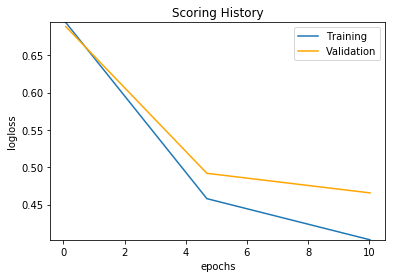

In [52]:
m_def.plot()

## Tuning idea: more effort

In [54]:
m_200_epochs = H2ODeepLearningEstimator(epochs = 200, 
                                        stopping_rounds = 5, #Default
                                        stopping_tolerance = 0, #Default
                                        stopping_metric = "logloss")

In [67]:
%time m_200_epochs.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 2.96 s, sys: 459 ms, total: 3.42 s
Wall time: 10min 56s


In [68]:
m_200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.120864398103
RMSE: 0.347655573956
LogLoss: 0.3825805303
Mean Per-Class Error: 0.171801794072
AUC: 0.915384340379
AUCPR: 0.633094219009
Gini: 0.830768680759

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.472907767906: 


,,NO,YES,Error,Rate
0,NO,1561.0,424.0,0.2136,(424.0/1985.0)
1,YES,324.0,2142.0,0.1314,(324.0/2466.0)
2,Total,1885.0,2566.0,0.1681,(748.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.472908,0.851351,213.0
1,max f2,0.078076,0.907138,347.0
2,max f0point5,0.707767,0.864633,124.0
3,max accuracy,0.474216,0.831948,212.0
4,max precision,0.999957,0.998660,0.0
5,max recall,0.000695,1.000000,398.0
6,max specificity,0.999957,0.999496,0.0
7,max absolute_mcc,0.474216,0.658962,212.0
8,max min_per_class_accuracy,0.547955,0.826700,186.0
9,max mean_per_class_accuracy,0.543288,0.828198,188.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 55.43 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.036621,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.066099,0.066099,80.494728,80.494728
1,,2,0.040216,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.006488,0.072587,80.494728,80.494728
2,,3,0.050101,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
3,,4,0.100202,0.999998,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.090430,0.180860,80.494728,80.494728
4,,5,0.150079,0.999846,1.804947,1.804947,1.000000,0.999959,1.000000,0.999986,0.090024,0.270884,80.494728,80.494728
5,,6,0.200180,0.997291,1.764478,1.794819,0.977578,0.999003,0.994388,0.999740,0.088402,0.359286,76.447761,79.481851
6,,7,0.300157,0.945995,1.699490,1.763066,0.941573,0.980232,0.976796,0.993242,0.169911,0.529197,69.948969,76.306602
7,,8,0.400135,0.805101,1.387173,1.669146,0.768539,0.880044,0.924761,0.964959,0.138686,0.667883,38.717297,66.914552
8,,9,0.500112,0.618989,1.212762,1.577910,0.671910,0.708405,0.874214,0.913671,0.121249,0.789132,21.276233,57.790989
9,,10,0.600090,0.425337,0.932894,1.470448,0.516854,0.521722,0.814676,0.848371,0.093268,0.882401,-6.710590,47.044751


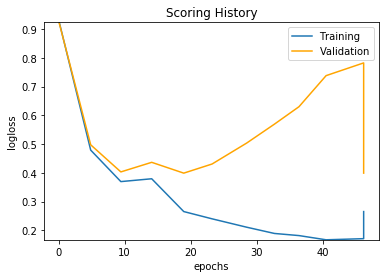

In [69]:
m_200_epochs.plot()

In [70]:
m_200_epochs

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1578267636222_133


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 1,628,773 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.478713,0.476109,0,5.71483e-05,0.0278459,-0.430796,0.346008
2,,3,200,Rectifier,0,0,0,0.291596,0.369041,0,-0.00559476,0.1009,-0.160923,0.294434
3,,4,2,Softmax,,0,0,0.0227161,0.0895336,0,-0.000452061,0.337927,0.026829,0.395453




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0856229273589
RMSE: 0.292613956193
LogLoss: 0.265245527233
Mean Per-Class Error: 0.124800178893
AUC: 0.955105585975
AUCPR: 0.684694521495
Gini: 0.91021117195

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.452261886113: 


,,NO,YES,Error,Rate
0,NO,3694.0,801.0,0.1782,(801.0/4495.0)
1,YES,466.0,5160.0,0.0828,(466.0/5626.0)
2,Total,4160.0,5961.0,0.1252,(1267.0/10121.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.452262,0.890653,222.0
1,max f2,0.206615,0.930441,309.0
2,max f0point5,0.708173,0.908921,128.0
3,max accuracy,0.517414,0.876692,199.0
4,max precision,0.999972,1.000000,0.0
5,max recall,0.001466,1.000000,397.0
6,max specificity,0.999972,1.000000,0.0
7,max absolute_mcc,0.517414,0.750300,199.0
8,max min_per_class_accuracy,0.543723,0.873637,189.0
9,max mean_per_class_accuracy,0.517414,0.875200,199.0



Gains/Lift Table: Avg response rate: 55.59 %, avg score: 55.54 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.032013,1.000000,1.798969,1.798969,1.000000,1.000000,1.000000,1.000000,0.057590,0.057590,79.896907,79.896907
1,,2,0.040016,1.000000,1.798969,1.798969,1.000000,1.000000,1.000000,1.000000,0.014397,0.071987,79.896907,79.896907
2,,3,0.050094,1.000000,1.798969,1.798969,1.000000,1.000000,1.000000,1.000000,0.018130,0.090117,79.896907,79.896907
3,,4,0.100089,0.999998,1.798969,1.798969,1.000000,1.000000,1.000000,1.000000,0.089940,0.180057,79.896907,79.896907
4,,5,0.150084,0.999830,1.798969,1.798969,1.000000,0.999958,1.000000,0.999986,0.089940,0.269996,79.896907,79.896907
5,,6,0.200079,0.997372,1.798969,1.798969,1.000000,0.999014,1.000000,0.999743,0.089940,0.359936,79.896907,79.896907
6,,7,0.300069,0.945947,1.779415,1.792453,0.989130,0.979834,0.996378,0.993109,0.177924,0.537860,77.941506,79.245321
7,,8,0.400059,0.806103,1.631871,1.752318,0.907115,0.880195,0.974068,0.964888,0.163171,0.701031,63.187115,75.231761
8,,9,0.500049,0.621746,1.271011,1.656075,0.706522,0.716606,0.920569,0.915241,0.127089,0.828119,27.101076,65.607526
9,,10,0.600040,0.432754,0.954591,1.539181,0.530632,0.526413,0.855590,0.850447,0.095450,0.923569,-4.540870,53.918052




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.125167545079
RMSE: 0.353790255772
LogLoss: 0.398910142959
Mean Per-Class Error: 0.183428160696
AUC: 0.908089181465
AUCPR: 0.631633985515
Gini: 0.81617836293

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32666763625: 


,,NO,YES,Error,Rate
0,NO,1278.0,615.0,0.3249,(615.0/1893.0)
1,YES,199.0,2180.0,0.0836,(199.0/2379.0)
2,Total,1477.0,2795.0,0.1905,(814.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326668,0.842675,267.0
1,max f2,0.075685,0.903248,354.0
2,max f0point5,0.757664,0.863564,103.0
3,max accuracy,0.482270,0.817650,208.0
4,max precision,0.999959,0.994406,0.0
5,max recall,0.000984,1.000000,398.0
6,max specificity,0.999959,0.997887,0.0
7,max absolute_mcc,0.482270,0.629736,208.0
8,max min_per_class_accuracy,0.535616,0.812106,187.0
9,max mean_per_class_accuracy,0.615737,0.816572,157.0



Gains/Lift Table: Avg response rate: 55.69 %, avg score: 55.22 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.034410,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.061791,0.061791,79.571248,79.571248
1,,2,0.040028,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.010088,0.071879,79.571248,79.571248
2,,3,0.050094,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.089954,79.571248,79.571248
3,,4,0.100187,0.999999,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.089954,0.179908,79.571248,79.571248
4,,5,0.150047,0.999845,1.778851,1.790110,0.990610,0.999962,0.996880,0.999987,0.088693,0.268600,77.885133,79.010964
5,,6,0.200140,0.997234,1.762148,1.783111,0.981308,0.998987,0.992982,0.999737,0.088272,0.356873,76.214776,78.311099
6,,7,0.300094,0.933094,1.665345,1.743886,0.927400,0.974027,0.971139,0.991174,0.166456,0.523329,66.534460,74.388615
7,,8,0.400047,0.783056,1.442458,1.668573,0.803279,0.864246,0.929198,0.959460,0.144178,0.667507,44.245757,66.857310
8,,9,0.500000,0.599690,1.122846,1.559479,0.625293,0.687381,0.868446,0.905070,0.112232,0.779739,12.284598,55.947877
9,,10,0.599953,0.429084,0.920986,1.453105,0.512881,0.511739,0.809208,0.839540,0.092055,0.871795,-7.901397,45.310484




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-09 15:08:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-09 15:08:11,9.294 sec,1349 obs/sec,0.094426,1,3329.0,0.572700,0.923316,-0.328529,...,0.720678,1.798969,0.402035,0.571896,0.920050,-0.325416,0.656559,0.723078,1.795712,0.414560
2,,2020-01-09 15:09:19,1 min 15.767 sec,2710 obs/sec,4.851510,52,171040.0,0.402991,0.478975,0.342178,...,0.829953,1.798969,0.215690,0.410524,0.497424,0.317041,0.862993,0.806691,1.795712,0.245552
3,,2020-01-09 15:10:17,2 min 14.380 sec,2867 obs/sec,9.418522,101,332050.0,0.348306,0.369468,0.508596,...,0.787576,1.798969,0.185456,0.364950,0.403160,0.460261,0.901225,0.764269,1.795712,0.207631
4,,2020-01-09 15:11:17,3 min 14.486 sec,2934 obs/sec,14.092157,151,496819.0,0.355687,0.379336,0.487546,...,0.757647,1.798969,0.167276,0.377917,0.436508,0.421223,0.904392,0.721830,1.795712,0.185627
5,,2020-01-09 15:12:23,4 min 19.562 sec,2921 obs/sec,18.948943,203,668045.0,0.292614,0.265246,0.653177,...,0.684695,1.798969,0.125185,0.353790,0.398910,0.492765,0.908089,0.631634,1.795712,0.190543
6,,2020-01-09 15:13:20,5 min 18.054 sec,2922 obs/sec,23.239682,249,819315.0,0.279158,0.239986,0.684341,...,0.655447,1.798969,0.113823,0.358332,0.430677,0.479658,0.905787,0.597877,1.795712,0.189607
7,,2020-01-09 15:14:28,6 min 24.985 sec,2940 obs/sec,28.478485,305,1004009.0,0.261241,0.210859,0.723561,...,0.593537,1.798969,0.100089,0.365777,0.503496,0.457811,0.899713,0.529876,1.795712,0.184691
8,,2020-01-09 15:15:26,7 min 22.911 sec,2924 obs/sec,32.678797,350,1152091.0,0.248844,0.189132,0.749175,...,0.530930,1.798969,0.089418,0.369500,0.569236,0.446720,0.900862,0.505920,1.795712,0.186096
9,,2020-01-09 15:16:21,8 min 19.349 sec,2896 obs/sec,36.407148,390,1283534.0,0.244040,0.181705,0.758765,...,0.507734,1.798969,0.086256,0.376156,0.630035,0.426606,0.892656,0.477356,1.795712,0.191245



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.002298
1,CRSDepTime,0.869151,0.869151,0.001997
2,TailNum.NA,0.738761,0.738761,0.001698
3,UniqueCarrier.PS,0.584059,0.584059,0.001342
4,Cancelled,0.521741,0.521741,0.001199
5,CRSElapsedTime,0.511330,0.511330,0.001175
6,AirTime,0.509767,0.509767,0.001171
7,DayofMonth,0.456315,0.456315,0.001049
8,CRSArrTime,0.421501,0.421501,0.000969
9,Year,0.413943,0.413943,0.000951



See the whole table with table.as_data_frame()


## Tuning idea: add another layer

In [71]:
m_200x200x200 = H2ODeepLearningEstimator(epochs = 200, 
                                         #same early stopping (i.e. it's the default)
                                         hidden = [200, 200, 200])

In [72]:
%time m_200x200x200.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 3.48 s, sys: 601 ms, total: 4.08 s
Wall time: 12min 14s


In [73]:
m_200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.123075254078
RMSE: 0.350820829026
LogLoss: 0.383144856439
Mean Per-Class Error: 0.174660521633
AUC: 0.912952373948
AUCPR: 0.672609310775
Gini: 0.825904747896

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.546038887379: 


,,NO,YES,Error,Rate
0,NO,1485.0,500.0,0.2519,(500.0/1985.0)
1,YES,299.0,2167.0,0.1212,(299.0/2466.0)
2,Total,1784.0,2667.0,0.1795,(799.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.546039,0.844341,191.0
1,max f2,0.196323,0.908408,314.0
2,max f0point5,0.817984,0.867263,89.0
3,max accuracy,0.611157,0.824309,167.0
4,max precision,0.999955,1.000000,0.0
5,max recall,0.005432,1.000000,393.0
6,max specificity,0.999955,1.000000,0.0
7,max absolute_mcc,0.693452,0.646884,136.0
8,max min_per_class_accuracy,0.637889,0.822790,156.0
9,max mean_per_class_accuracy,0.693452,0.825339,136.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 59.86 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.026960,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.048662,0.048662,80.494728,80.494728
1,,2,0.030106,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.005677,0.054339,80.494728,80.494728
2,,3,0.040216,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.072587,80.494728,80.494728
3,,4,0.050101,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
4,,5,0.100202,0.999974,1.804947,1.804947,1.000000,0.999993,1.000000,0.999997,0.090430,0.180860,80.494728,80.494728
5,,6,0.150079,0.999552,1.796817,1.802245,0.995495,0.999846,0.998503,0.999947,0.089619,0.270479,79.681689,80.224527
6,,7,0.200180,0.994529,1.699726,1.776587,0.941704,0.997755,0.984287,0.999398,0.085158,0.355637,69.972614,77.658672
7,,8,0.300157,0.929411,1.675153,1.742801,0.928090,0.965875,0.965569,0.988232,0.167478,0.523114,67.515332,74.280089
8,,9,0.400135,0.826890,1.504799,1.683334,0.833708,0.882355,0.932622,0.961777,0.150446,0.673560,50.479875,68.333377
9,,10,0.500112,0.687472,1.168146,1.580342,0.647191,0.759779,0.875562,0.921396,0.116788,0.790349,16.814566,58.034243


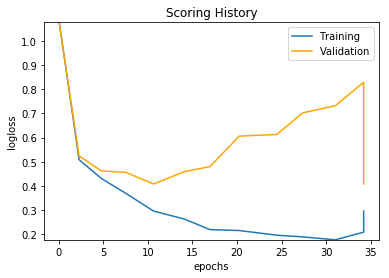

In [74]:
m_200x200x200.plot()

In [75]:
m_200x200x200

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1578267636222_159


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841,202 weights/biases, 9.7 MB, 1,206,286 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.14775,0.320165,0,-0.000494677,0.0310368,-0.237112,0.376541
2,,3,200,Rectifier,0,0,0,0.0528397,0.0910612,0,-0.0379932,0.0907655,0.613055,0.124031
3,,4,200,Rectifier,0,0,0,0.133058,0.156004,0,-0.0100341,0.0808463,-0.0334407,0.209052
4,,5,2,Softmax,,0,0,0.0177064,0.0144134,0,-0.0236163,0.264461,-0.00761471,0.0528381




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0957240219353
RMSE: 0.309392989473
LogLoss: 0.295936213092
Mean Per-Class Error: 0.135413905287
AUC: 0.947840436762
AUCPR: 0.690064941028
Gini: 0.895680873525

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.528363897007: 


,,NO,YES,Error,Rate
0,NO,3539.0,928.0,0.2077,(928.0/4467.0)
1,YES,450.0,5121.0,0.0808,(450.0/5571.0)
2,Total,3989.0,6049.0,0.1373,(1378.0/10038.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.528364,0.881411,196.0
1,max f2,0.269942,0.926376,289.0
2,max f0point5,0.787238,0.900936,100.0
3,max accuracy,0.574146,0.864714,179.0
4,max precision,0.999947,1.000000,0.0
5,max recall,0.010171,1.000000,392.0
6,max specificity,0.999947,1.000000,0.0
7,max absolute_mcc,0.630974,0.727015,159.0
8,max min_per_class_accuracy,0.630974,0.863938,159.0
9,max mean_per_class_accuracy,0.630974,0.864586,159.0



Gains/Lift Table: Avg response rate: 55.50 %, avg score: 59.73 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.023511,1.000000,1.801831,1.801831,1.000000,1.000000,1.000000,1.000000,0.042362,0.042362,80.183091,80.183091
1,,2,0.030086,1.000000,1.801831,1.801831,1.000000,1.000000,1.000000,1.000000,0.011847,0.054209,80.183091,80.183091
2,,3,0.040048,1.000000,1.801831,1.801831,1.000000,1.000000,1.000000,1.000000,0.017950,0.072159,80.183091,80.183091
3,,4,0.050010,1.000000,1.801831,1.801831,1.000000,1.000000,1.000000,1.000000,0.017950,0.090109,80.183091,80.183091
4,,5,0.100020,0.999979,1.801831,1.801831,1.000000,0.999995,1.000000,0.999997,0.090109,0.180219,80.183091,80.183091
5,,6,0.150030,0.999553,1.801831,1.801831,1.000000,0.999853,1.000000,0.999949,0.090109,0.270328,80.183091,80.183091
6,,7,0.200040,0.995584,1.801831,1.801831,1.000000,0.998289,1.000000,0.999534,0.090109,0.360438,80.183091,80.183091
7,,8,0.300060,0.941193,1.739018,1.780893,0.965139,0.974349,0.988380,0.991139,0.173936,0.534374,73.901808,78.089330
8,,9,0.399980,0.841265,1.591647,1.733617,0.883350,0.897960,0.962142,0.967862,0.159038,0.693412,59.164724,73.361714
9,,10,0.500000,0.691514,1.281382,1.643152,0.711155,0.767758,0.911935,0.927833,0.128164,0.821576,28.138174,64.315204




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.130543381292
RMSE: 0.361307876045
LogLoss: 0.407964389343
Mean Per-Class Error: 0.182590469034
AUC: 0.903518238363
AUCPR: 0.662941522995
Gini: 0.807036476725

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.496415356631: 


,,NO,YES,Error,Rate
0,NO,1301.0,592.0,0.3127,(592.0/1893.0)
1,YES,238.0,2141.0,0.1,(238.0/2379.0)
2,Total,1539.0,2733.0,0.1943,(830.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.496415,0.837637,221.0
1,max f2,0.193539,0.903123,318.0
2,max f0point5,0.769137,0.862292,111.0
3,max accuracy,0.635505,0.816479,163.0
4,max precision,0.999947,0.995223,0.0
5,max recall,0.003924,1.000000,396.0
6,max specificity,0.999947,0.998415,0.0
7,max absolute_mcc,0.735234,0.631662,124.0
8,max min_per_class_accuracy,0.650005,0.813524,157.0
9,max mean_per_class_accuracy,0.735234,0.817410,124.0



Gains/Lift Table: Avg response rate: 55.69 %, avg score: 60.73 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.025515,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.045818,0.045818,79.571248,79.571248
1,,2,0.030197,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.008407,0.054224,79.571248,79.571248
2,,3,0.040028,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.017654,0.071879,79.571248,79.571248
3,,4,0.050094,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.089954,79.571248,79.571248
4,,5,0.100187,0.999980,1.795712,1.795712,1.000000,0.999995,1.000000,0.999998,0.089954,0.179908,79.571248,79.571248
5,,6,0.150047,0.999412,1.778851,1.790110,0.990610,0.999835,0.996880,0.999943,0.088693,0.268600,77.885133,79.010964
6,,7,0.200140,0.993912,1.736974,1.776810,0.967290,0.997550,0.989474,0.999344,0.087011,0.355612,73.697423,77.681025
7,,8,0.300094,0.934208,1.593853,1.715872,0.887588,0.969757,0.955538,0.989490,0.159311,0.514922,59.385253,71.587191
8,,9,0.400047,0.836803,1.497128,1.661218,0.833724,0.891090,0.925102,0.964904,0.149643,0.664565,49.712797,66.121793
9,,10,0.500000,0.693932,1.156489,1.560319,0.644028,0.764500,0.868914,0.924842,0.115595,0.780160,15.648930,56.031946




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-09 15:19:09,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-09 15:19:11,7.521 sec,948 obs/sec,0.047454,1,1673.0,0.600263,1.075810,-0.458908,...,0.740808,1.801831,0.402869,0.599314,1.070515,-0.455546,0.686601,0.751860,1.795712,0.423455
2,,2020-01-09 15:20:09,1 min 5.804 sec,1493 obs/sec,2.269522,48,80012.0,0.412836,0.508426,0.309917,...,0.809614,1.801831,0.269576,0.421020,0.523747,0.281672,0.810632,0.797218,1.795712,0.290964
3,,2020-01-09 15:21:14,2 min 10.666 sec,1494 obs/sec,4.773110,101,168276.0,0.377741,0.430745,0.422259,...,0.846648,1.801831,0.226738,0.393272,0.461815,0.373238,0.861428,0.828299,1.795712,0.245084
4,,2020-01-09 15:22:13,3 min 10.119 sec,1596 obs/sec,7.513175,159,264877.0,0.349719,0.369325,0.504797,...,0.761759,1.801831,0.158398,0.384236,0.456173,0.401709,0.893042,0.715341,1.795712,0.201311
5,,2020-01-09 15:23:15,4 min 12.249 sec,1693 obs/sec,10.633782,225,374894.0,0.309393,0.295936,0.612416,...,0.690065,1.801831,0.137278,0.361308,0.407964,0.470980,0.903518,0.662942,1.795712,0.194288
6,,2020-01-09 15:24:22,5 min 18.236 sec,1761 obs/sec,14.079421,298,496370.0,0.291046,0.263310,0.657019,...,0.611929,1.801831,0.120841,0.366734,0.458859,0.454970,0.901971,0.581742,1.795712,0.188436
7,,2020-01-09 15:25:19,6 min 16.337 sec,1794 obs/sec,16.964714,359,598091.0,0.267204,0.219533,0.710911,...,0.599545,1.801831,0.100817,0.361557,0.479914,0.470250,0.905009,0.548486,1.795712,0.177434
8,,2020-01-09 15:26:25,7 min 24.605 sec,1816 obs/sec,20.242320,428,713643.0,0.263441,0.215741,0.718996,...,0.537602,1.801831,0.103905,0.375353,0.605723,0.429050,0.892409,0.480044,1.795712,0.193352
9,,2020-01-09 15:27:51,8 min 47.872 sec,1834 obs/sec,24.458233,517,862275.0,0.252494,0.196443,0.741864,...,0.507635,1.801831,0.088962,0.371902,0.612588,0.439501,0.897710,0.506858,1.795712,0.188202



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.003967
1,CRSDepTime,0.832868,0.832868,0.003304
2,TailNum.NA,0.776154,0.776154,0.003079
3,AirTime,0.661264,0.661264,0.002623
4,CRSElapsedTime,0.600723,0.600723,0.002383
5,Cancelled,0.419586,0.419586,0.001664
6,UniqueCarrier.PS,0.394083,0.394083,0.001563
7,Year,0.370601,0.370601,0.001470
8,Month,0.342942,0.342942,0.001360
9,CRSArrTime,0.313165,0.313165,0.001242



See the whole table with table.as_data_frame()


## Tuning idea: change #neurons in hidden layer

In [76]:
m_400x400 = H2ODeepLearningEstimator(epochs = 200, 
                                         #same early stopping (i.e. it's the default)
                                         hidden = [400, 400])

In [77]:
%time m_400x400.train(xAll, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 6.76 s, sys: 1.01 s, total: 7.77 s
Wall time: 24min 58s


In [78]:
m_400x400.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.124217784529
RMSE: 0.352445434825
LogLoss: 0.386576750248
Mean Per-Class Error: 0.177344070799
AUC: 0.908479655813
AUCPR: 0.672431839555
Gini: 0.816959311626

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.476173492523: 


,,NO,YES,Error,Rate
0,NO,1512.0,473.0,0.2383,(473.0/1985.0)
1,YES,331.0,2135.0,0.1342,(331.0/2466.0)
2,Total,1843.0,2608.0,0.1806,(804.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.476173,0.841545,214.0
1,max f2,0.122782,0.904044,336.0
2,max f0point5,0.696173,0.856164,125.0
3,max accuracy,0.526716,0.822736,192.0
4,max precision,0.999951,0.998423,0.0
5,max recall,0.001186,1.000000,398.0
6,max specificity,0.999951,0.999496,0.0
7,max absolute_mcc,0.558928,0.642491,178.0
8,max min_per_class_accuracy,0.548937,0.821979,182.0
9,max mean_per_class_accuracy,0.558928,0.822656,178.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 56.19 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.033476,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.060422,0.060422,80.494728,80.494728
1,,2,0.040216,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.012165,0.072587,80.494728,80.494728
2,,3,0.050101,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.090430,80.494728,80.494728
3,,4,0.100202,0.999980,1.796853,1.800900,0.995516,0.999995,0.997758,0.999998,0.090024,0.180454,79.685335,80.090032
4,,5,0.150079,0.999408,1.804947,1.802245,1.000000,0.999793,0.998503,0.999930,0.090024,0.270479,80.494728,80.224527
5,,6,0.200180,0.994780,1.772572,1.794819,0.982063,0.997879,0.994388,0.999416,0.088808,0.359286,77.257155,79.481851
6,,7,0.300157,0.928849,1.642705,1.744152,0.910112,0.969723,0.966317,0.989526,0.164234,0.523520,64.270483,74.415190
7,,8,0.400135,0.771608,1.415565,1.662051,0.784270,0.856617,0.920831,0.956317,0.141525,0.665045,41.556540,66.205140
8,,9,0.500112,0.602099,1.192482,1.568180,0.660674,0.686020,0.868823,0.902282,0.119221,0.784266,19.248203,56.817971
9,,10,0.600090,0.450615,0.908558,1.458284,0.503371,0.526946,0.807937,0.839750,0.090835,0.875101,-9.144227,45.828388


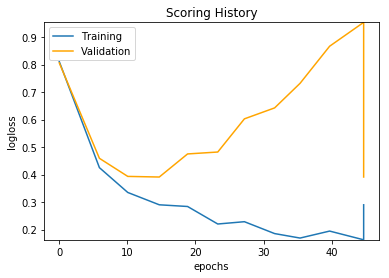

In [79]:
m_400x400.plot()

In [80]:
m_400x400

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1578267636222_187


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,682,002 weights/biases, 19.3 MB, 1,574,757 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.569628,0.472722,0,8.28428e-05,0.025253,-0.355534,0.215655
2,,3,400,Rectifier,0,0,0,0.334103,0.361704,0,-0.00493757,0.0717543,-0.16388,0.300565
3,,4,2,Softmax,,0,0,0.0243145,0.0360212,0,0.00278403,0.234456,-0.0786056,0.0473223




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0937970503348
RMSE: 0.306263041085
LogLoss: 0.290243594726
Mean Per-Class Error: 0.136539862861
AUC: 0.94636128464
AUCPR: 0.686357674847
Gini: 0.89272256928

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.489300195349: 


,,NO,YES,Error,Rate
0,NO,3674.0,779.0,0.1749,(779.0/4453.0)
1,YES,581.0,4998.0,0.1041,(581.0/5579.0)
2,Total,4255.0,5777.0,0.1356,(1360.0/10032.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.489300,0.880240,204.0
1,max f2,0.191102,0.923307,313.0
2,max f0point5,0.728532,0.900868,116.0
3,max accuracy,0.489300,0.864434,204.0
4,max precision,0.999935,1.000000,0.0
5,max recall,0.002860,1.000000,397.0
6,max specificity,0.999935,1.000000,0.0
7,max absolute_mcc,0.489300,0.724755,204.0
8,max min_per_class_accuracy,0.546445,0.859473,184.0
9,max mean_per_class_accuracy,0.574728,0.863460,174.0



Gains/Lift Table: Avg response rate: 55.61 %, avg score: 56.24 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.030303,1.000000,1.798172,1.798172,1.000000,1.000000,1.000000,1.000000,0.054490,0.054490,79.817172,79.817172
1,,2,0.040072,1.000000,1.798172,1.798172,1.000000,1.000000,1.000000,1.000000,0.017566,0.072056,79.817172,79.817172
2,,3,0.050040,1.000000,1.798172,1.798172,1.000000,1.000000,1.000000,1.000000,0.017924,0.089980,79.817172,79.817172
3,,4,0.100080,0.999977,1.798172,1.798172,1.000000,0.999996,1.000000,0.999998,0.089980,0.179961,79.817172,79.817172
4,,5,0.150020,0.999513,1.798172,1.798172,1.000000,0.999831,1.000000,0.999942,0.089801,0.269762,79.817172,79.817172
5,,6,0.200060,0.994653,1.794590,1.797276,0.998008,0.997886,0.999502,0.999428,0.089801,0.359563,79.458970,79.727577
6,,7,0.300040,0.931819,1.769487,1.788016,0.984048,0.970162,0.994352,0.989676,0.176913,0.536476,76.948702,78.801593
7,,8,0.400020,0.784617,1.590208,1.738576,0.884347,0.863348,0.966858,0.958102,0.158989,0.695465,59.020769,73.857619
8,,9,0.500000,0.611466,1.247784,1.640437,0.693918,0.697955,0.912281,0.906083,0.124754,0.820219,24.778416,64.043735
9,,10,0.599980,0.447585,0.932253,1.522426,0.518445,0.530395,0.846652,0.843479,0.093207,0.913425,-6.774747,52.242616




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.123680964717
RMSE: 0.35168304582
LogLoss: 0.39126975767
Mean Per-Class Error: 0.176498135761
AUC: 0.907822940961
AUCPR: 0.672120091369
Gini: 0.815645881921

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48052906794: 


,,NO,YES,Error,Rate
0,NO,1454.0,439.0,0.2319,(439.0/1893.0)
1,YES,321.0,2058.0,0.1349,(321.0/2379.0)
2,Total,1775.0,2497.0,0.1779,(760.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.480529,0.844135,208.0
1,max f2,0.111968,0.904681,343.0
2,max f0point5,0.706611,0.865356,124.0
3,max accuracy,0.495553,0.823034,202.0
4,max precision,0.999955,0.995122,0.0
5,max recall,0.005522,1.000000,394.0
6,max specificity,0.999955,0.998415,0.0
7,max absolute_mcc,0.564435,0.642877,177.0
8,max min_per_class_accuracy,0.555197,0.820933,181.0
9,max mean_per_class_accuracy,0.612728,0.823502,159.0



Gains/Lift Table: Avg response rate: 55.69 %, avg score: 56.51 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.032069,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.057587,0.057587,79.571248,79.571248
1,,2,0.040028,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.014292,0.071879,79.571248,79.571248
2,,3,0.050094,1.000000,1.795712,1.795712,1.000000,1.000000,1.000000,1.000000,0.018075,0.089954,79.571248,79.571248
3,,4,0.100187,0.999983,1.787321,1.791517,0.995327,0.999997,0.997664,0.999998,0.089533,0.179487,78.732130,79.151689
4,,5,0.150047,0.999414,1.778851,1.787308,0.990610,0.999816,0.995320,0.999938,0.088693,0.268180,77.885133,78.730821
5,,6,0.200140,0.993995,1.745365,1.776810,0.971963,0.997603,0.989474,0.999353,0.087432,0.355612,74.536541,77.681025
6,,7,0.300094,0.922512,1.640112,1.731280,0.913349,0.967398,0.964119,0.988710,0.163934,0.519546,64.011211,73.127974
7,,8,0.400047,0.780289,1.442458,1.659116,0.803279,0.854918,0.923932,0.955281,0.144178,0.663724,44.245757,65.911645
8,,9,0.500000,0.609642,1.227981,1.572930,0.683841,0.693090,0.875936,0.902868,0.122741,0.786465,22.798137,57.292980
9,,10,0.599953,0.456778,0.895754,1.460111,0.498829,0.532164,0.813110,0.841108,0.089533,0.875998,-10.424647,46.011113




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-09 15:31:28,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-09 15:31:30,19.852 sec,466 obs/sec,0.028166,1,993.0,0.535011,0.810981,-0.159554,...,0.729827,1.798172,0.404207,0.532061,0.806221,-0.147203,0.682229,0.739680,1.795712,0.395365
2,,2020-01-09 15:34:27,3 min 11.719 sec,1294 obs/sec,5.911672,209,208416.0,0.377089,0.425365,0.423957,...,0.797626,1.798172,0.213517,0.391775,0.459313,0.377998,0.870796,0.768156,1.795712,0.233146
3,,2020-01-09 15:36:37,5 min 23.538 sec,1275 obs/sec,10.070600,356,355039.0,0.330150,0.335103,0.558442,...,0.790833,1.798172,0.165670,0.358138,0.393520,0.480222,0.900480,0.743587,1.795712,0.191479
4,,2020-01-09 15:39:02,7 min 48.606 sec,1266 obs/sec,14.692810,519,517995.0,0.306263,0.290244,0.620025,...,0.686358,1.798172,0.135566,0.351683,0.391270,0.498789,0.907823,0.672120,1.795712,0.177903
5,,2020-01-09 15:41:28,10 min 12.434 sec,1229 obs/sec,18.841639,665,664262.0,0.305005,0.284078,0.623140,...,0.571884,1.798172,0.126196,0.370825,0.475221,0.442742,0.900690,0.543281,1.795712,0.189607
6,,2020-01-09 15:43:31,12 min 14.960 sec,1260 obs/sec,23.270061,821,820386.0,0.265118,0.220381,0.715262,...,0.562845,1.798172,0.099781,0.361875,0.482197,0.469317,0.901940,0.543423,1.795712,0.181180
7,,2020-01-09 15:45:33,14 min 19.713 sec,1259 obs/sec,27.178783,959,958188.0,0.272414,0.228745,0.699374,...,0.599243,1.798172,0.103768,0.380913,0.602888,0.412012,0.896968,0.560343,1.795712,0.190543
8,,2020-01-09 15:48:04,16 min 48.821 sec,1243 obs/sec,31.607432,1115,1114320.0,0.243987,0.185539,0.758842,...,0.503967,1.798172,0.085227,0.375247,0.642678,0.429373,0.895927,0.488492,1.795712,0.187032
9,,2020-01-09 15:50:16,19 min 5.206 sec,1226 obs/sec,35.340065,1247,1245914.0,0.234301,0.169255,0.777610,...,0.432978,1.798172,0.079246,0.375919,0.732073,0.427327,0.891512,0.441905,1.795712,0.186096



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DepTime,1.000000,1.000000,0.001653
1,CRSDepTime,0.807286,0.807286,0.001334
2,TailNum.NA,0.648522,0.648522,0.001072
3,CRSElapsedTime,0.603382,0.603382,0.000997
4,Year,0.597730,0.597730,0.000988
5,Cancelled,0.575374,0.575374,0.000951
6,AirTime,0.567263,0.567263,0.000938
7,Diverted,0.559868,0.559868,0.000925
8,UniqueCarrier.PS,0.549383,0.549383,0.000908
9,DayofMonth,0.528160,0.528160,0.000873



See the whole table with table.as_data_frame()


## Why did it take longer?

In [81]:
m_def.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,002 weights/biases, 9.2 MB, 353,485 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.514862,0.478055,0,4.98625e-05,0.0256799,-0.340515,0.246671
2,,3,200,Rectifier,0,0,0,0.232585,0.287416,0,-0.0062381,0.0924348,-0.139713,0.274743
3,,4,2,Softmax,,0,0,0.0164935,0.0218719,0,0.021392,0.30601,0.0439513,0.306651


In [82]:
m_def.summary()['units']

[3801, 200, 200, 2]

In [83]:
3801*200 + 200*200 + 200*2  #plus 200 + 200 + 2 biases

800600

In [84]:
m_200x200x200.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841,202 weights/biases, 9.7 MB, 1,206,286 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.14775,0.320165,0,-0.000494677,0.0310368,-0.237112,0.376541
2,,3,200,Rectifier,0,0,0,0.0528397,0.0910612,0,-0.0379932,0.0907655,0.613055,0.124031
3,,4,200,Rectifier,0,0,0,0.133058,0.156004,0,-0.0100341,0.0808463,-0.0334407,0.209052
4,,5,2,Softmax,,0,0,0.0177064,0.0144134,0,-0.0236163,0.264461,-0.00761471,0.0528381


In [85]:
m_400x400.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,682,002 weights/biases, 19.3 MB, 1,574,757 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3801,Input,0,,,,,,,,,
1,,2,400,Rectifier,0,0,0,0.569628,0.472722,0,8.28428e-05,0.025253,-0.355534,0.215655
2,,3,400,Rectifier,0,0,0,0.334103,0.361704,0,-0.00493757,0.0717543,-0.16388,0.300565
3,,4,2,Softmax,,0,0,0.0243145,0.0360212,0,0.00278403,0.234456,-0.0786056,0.0473223


In [86]:
train.nlevels()  #enum cardinality

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [87]:
train.structure()

H2OFrame: 'py_24_sid_9086' 
Dimensions: 35255 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 19 21 22 23 26 28
$ DayOfWeek         :  num 3 4 6 7 1 3 4 5 1 3
$ DepTime           :  num 741 729 741 729 749 728 728 731 735 741
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 725
$ ArrTime           :  num 912 903 918 847 922 848 852 902 904 919
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 855
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451


$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>","-N958<0xE5>","-N959<0xE5>","-N965<0xE5>","-N967<0xE5>","-N970<0xE5>","-N991<0xE5>","0","000000","112","<0xE4>NKNO<0xE6>","EI-BWD","N055AA","N056AA","N057AA","N058AA","N059AA","N060AA","N061AA","N064AA","N066AA","N067AA","N068AA","N069AA","N070AA","N071AA","N073AA","N076AA","N077AA","N078AA","N079AA","N082AA","N084AA","N101<0xE4E6>","N102","N102UW","N103","N10323","N103DA","N103UW","N104","N104UW","N105","N105UW","N106DA","N106UW","N107UW","N108<0xE4E6>","N108DL","N108UW","N109UW","N110HM","N110UW","N111UW","N112DL","N112UW","N113<0xE4E6>","N113DA","N113UW","N114<0xE4E6>","N114UW","N115<0xE4E6>","N116<0xE4E6>","N116DL","N117<0xE4E6>","N117DL","N118<0xE4E6>","N118DL","N118UW","N119<0xE4E6>","N119DL","N119UW","N120<0xE4E6>","N120DL","N

$ ActualElapsedTime :  num 91 94 97 78 93 80 84 91 89 98
$ CRSElapsedTime    :  num 79 79 79 79 79 79 79 79 79 90
$ AirTime           :  num nan nan nan nan nan nan nan nan nan nan
$ ArrDelay          :  num 23 14 29 -2 33 -1 3 13 15 24
$ DepDelay          :  num 11 -1 11 -1 19 -2 -2 1 5 16
$ Origin            :  Factor w/ 132 level(s) "ABE","ABQ","ACY","ALB","AMA","ANC","ATL","AUS","AVP","BDL","BGM","BHM","BIL","BNA","BOI","BOS","BTV","BUF","BUR","BWI","CAE","CHO","CHS","CLE","CLT","CMH","COS","CRP","CRW","CVG","DAL","DAY","DCA","DEN","DFW","DSM","DTW","EGE","ELP","ERI","EWR","EYW","FLL","GEG","GNV","GRR","GSO","HNL","HOU","HPN","HRL","IAD","IAH","ICT","IND","ISP","JAN","JAX","JFK","KOA","LAN","LAS","LAX","LBB","LEX","LGA","LIH","LIT","LYH","MAF","MCI","MCO","MDT","MDW","MEM","MFR","MHT","MIA","MKE","MLB","MRY","MSP","MSY","MYR","OAK","OGG","OKC","OMA","ONT","ORD","ORF","PBI","PDX","PHF","PHL","PHX","PIT","PSP","PVD","PWM","RDU","RIC","RNO","ROA","ROC","RSW","SAN","SAT","SAV","SBN","S

## Models without that high-cardinality column

In [88]:
x2 = list(filter(lambda v : v != 'TailNum', xAll))

In [89]:
m2_def = H2ODeepLearningEstimator()

In [90]:
%time m2_def.train(x2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 562 ms, sys: 89.9 ms, total: 652 ms
Wall time: 43.4 s


In [91]:
m2_200_epochs = H2ODeepLearningEstimator(epochs = 200, 
                                        stopping_rounds = 5, #Default
                                        stopping_tolerance = 0, #Default
                                        stopping_metric = "logloss")

In [92]:
%time m2_200_epochs.train(x2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 649 ms, sys: 94.4 ms, total: 744 ms
Wall time: 2min 5s


In [93]:
m2_200x200x200 = H2ODeepLearningEstimator(epochs = 200, 
                                         #same early stopping (i.e. it's the default)
                                         hidden = [200, 200, 200])

In [94]:
%time m2_200x200x200.train(x2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 700 ms, sys: 101 ms, total: 800 ms
Wall time: 2min 36s


In [95]:
m2_400x400 = H2ODeepLearningEstimator(epochs = 200, 
                                         #same early stopping (i.e. it's the default)
                                         hidden = [400, 400])

In [97]:
%time m2_400x400.train(x2, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.64 s, sys: 283 ms, total: 1.93 s
Wall time: 5min 56s


In [98]:
all_models = [m_def, m2_def, m_200_epochs, m2_200_epochs, m_200x200x200, m2_200x200x200, m_400x400, m2_400x400]

loglosses = map(lambda x: x.logloss(), all_models)
print(" defaults: %.4f --> %.4f\n 200 epochs: %.4f --> %.4f\n 200x200x200: %.4f --> %.4f\n 400x400: %.4f --> %.4f\n" % (loglosses))

mse = map(lambda x: x.mse(), all_models)
print(" defaults: %.4f --> %.4f\n 200 epochs: %.4f --> %.4f\n 200x200x200: %.4f --> %.4f\n 400x400: %.4f --> %.4f\n" % (mse))

TypeError: float argument required, not list

## Deep learning with grids

In [109]:
g = h2o.grid.H2OGridSearch(
    H2ODeepLearningEstimator(activation="rectifier_with_dropout", epochs = 0.01, hidden = [400, 400]),
    grid_id = "dl_test",
    hyper_params = {"l1": [0, 1e-6, 3e-6, 1e-5],
                    "l2": [0, 1e-6, 3e-6, 1e-5],
                    "input_dropout_ratio": [0, 0.1, 0.2, 0.3],
                    "hidden_dropout_ratios": [[0, 0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6]],
                   },
    search_criteria = {"strategy": "RandomDiscrete", "max_models": 4, "seed": 77}
)
g.train(x2, y, train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [110]:
g2 = h2o.grid.H2OGridSearch(
    H2ODeepLearningEstimator(activation="rectifier_with_dropout", epochs = 40, hidden = [400, 400]),
    grid_id = "dl_test2",
    hyper_params = {"l1": [0, 1e-6, 3e-6, 1e-5],
                    "l2": [0, 1e-6, 3e-6, 1e-5],
                    "input_dropout_ratio": [0, 0.1],
                    "hidden_dropout_ratios": [[0, 0], [0.2, 0.2], [0.4, 0.4]],
                   },
    search_criteria = {"strategy": "RandomDiscrete", "max_models": 8, "seed": 88}
)
g2.train(x2, y, train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [111]:
models = g2.get_grid(sort_by='logloss', decreasing=True)
models

    hidden_dropout_ratios input_dropout_ratio      l1      l2  \
0              [0.4, 0.4]                 0.1  1.0E-5  3.0E-6   
1              [0.4, 0.4]                 0.1     0.0  1.0E-6   
2              [0.0, 0.0]                 0.1  1.0E-5  1.0E-5   
3              [0.0, 0.0]                 0.1  3.0E-6     0.0   
4              [0.0, 0.0]                 0.0     0.0  1.0E-6   
5              [0.2, 0.2]                 0.0  1.0E-6  3.0E-6   
6              [0.2, 0.2]                 0.0     0.0     0.0   
7              [0.4, 0.4]                 0.0  1.0E-5     0.0   

          model_ids              logloss  
0  dl_test2_model_3   0.4977736378330702  
1  dl_test2_model_7    0.474629154630674  
2  dl_test2_model_2   0.4094566799522759  
3  dl_test2_model_6  0.39363768439547675  
4  dl_test2_model_8   0.3573083527408826  
5  dl_test2_model_1   0.3542874611916054  
6  dl_test2_model_4  0.34534942154638915  
7  dl_test2_model_5  0.34489621919312513  


In [112]:
best_model = models.models[0]

In [113]:
h2o.save_model(best_model, "/tmp/")

u'/private/tmp/dl_test2_model_3'

In [114]:
best_model.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.16959081044
RMSE: 0.411814048376
LogLoss: 0.504965477528
Mean Per-Class Error: 0.255612552375
AUC: 0.828365927751
AUCPR: 0.792825924879
Gini: 0.656731855502

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.367565596262: 


,,NO,YES,Error,Rate
0,NO,1110.0,875.0,0.4408,(875.0/1985.0)
1,YES,313.0,2153.0,0.1269,(313.0/2466.0)
2,Total,1423.0,3028.0,0.2669,(1188.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.367566,0.783764,260.0
1,max f2,0.169996,0.872756,340.0
2,max f0point5,0.624340,0.789269,144.0
3,max accuracy,0.453361,0.748596,225.0
4,max precision,0.999941,1.000000,0.0
5,max recall,0.029995,1.000000,393.0
6,max specificity,0.999941,1.000000,0.0
7,max absolute_mcc,0.453361,0.489036,225.0
8,max min_per_class_accuracy,0.495914,0.741281,204.0
9,max mean_per_class_accuracy,0.524719,0.744387,190.0



Gains/Lift Table: Avg response rate: 55.40 %, avg score: 51.98 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.018248,80.494728,80.494728
1,,2,0.020220,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.018248,0.036496,80.494728,80.494728
2,,3,0.030106,1.000000,1.804947,1.804947,1.000000,1.000000,1.000000,1.000000,0.017843,0.054339,80.494728,80.494728
3,,4,0.040216,0.998026,1.804947,1.804947,1.000000,0.999735,1.000000,0.999933,0.018248,0.072587,80.494728,80.494728
4,,5,0.050101,0.987316,1.804947,1.804947,1.000000,0.993238,1.000000,0.998612,0.017843,0.090430,80.494728,80.494728
5,,6,0.100202,0.914294,1.764478,1.784712,0.977578,0.951668,0.988789,0.975140,0.088402,0.178832,76.447761,78.471245
6,,7,0.150079,0.844120,1.682991,1.750907,0.932432,0.880281,0.970060,0.943615,0.083942,0.262774,68.299139,75.090695
7,,8,0.200180,0.787850,1.570223,1.705685,0.869955,0.814812,0.945006,0.911378,0.078670,0.341444,57.022320,70.568531
8,,9,0.300157,0.682912,1.435846,1.615806,0.795506,0.735577,0.895210,0.852821,0.143552,0.484996,43.584570,61.580610
9,,10,0.400135,0.591524,1.285771,1.533344,0.712360,0.637639,0.849523,0.799056,0.128548,0.613544,28.577144,53.334376


## Regression with deep learning

In [115]:
train, valid, test = data.split_frame([0.8, 0.1], seed = 123)

In [116]:
y = "ArrDelay"
ignoreFields = ["IsArrDelayed", "ActualElapsedTime", "ArrTime", 
                "TailNum" # contains little related information 
               ]
xWithDep = [i for i in train.names if i not in ignoreFields]        

In [117]:
m_DLR_def = H2ODeepLearningEstimator(variable_importances = True)

In [118]:
%time m_DLR_def.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 448 ms, sys: 73.3 ms, total: 521 ms
Wall time: 43.1 s


In [119]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 50.8863049041
RMSE: 7.13346373819
MAE: 3.41181054864
RMSLE: NaN
Mean Residual Deviance: 50.8863049041


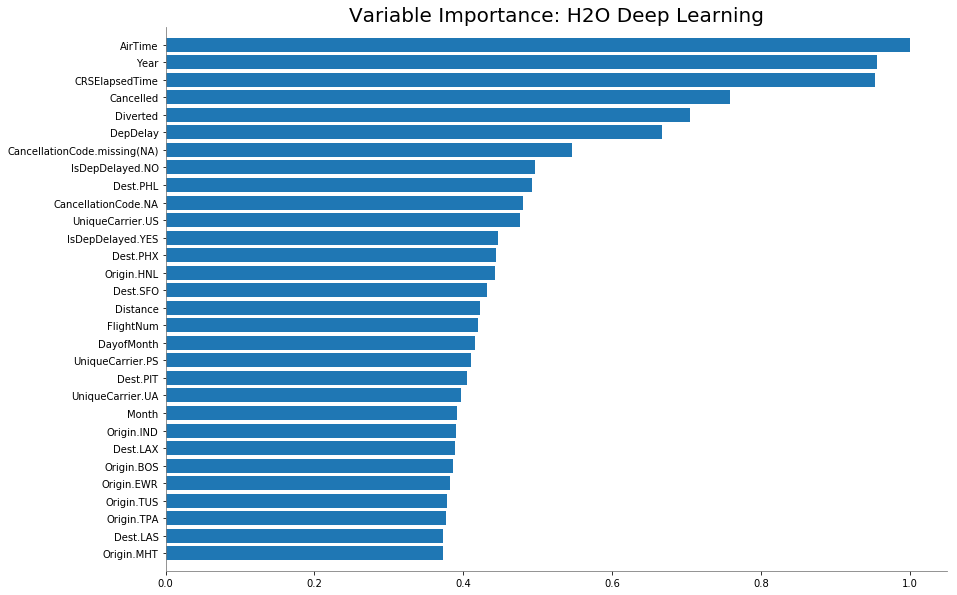

In [120]:
m_DLR_def.varimp_plot(30)

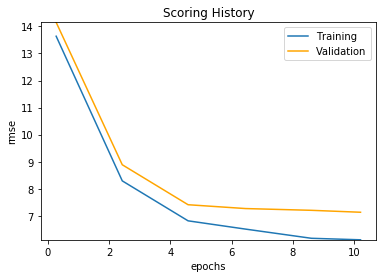

In [121]:
m_DLR_def.plot()

In [122]:
m_DLR_200_epochs = H2ODeepLearningEstimator(variable_importances = True,
                                            epochs = 200,
                                            stopping_rounds = 5, #Default
                                            stopping_tolerance = 0, #Default
                                            stopping_metric = "deviance")

In [123]:
%time m_DLR_200_epochs.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 625 ms, sys: 87.2 ms, total: 713 ms
Wall time: 2min 23s


In [124]:
m_DLR_200_epochs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 48.9569211024
RMSE: 6.99692225928
MAE: 3.31470520668
RMSLE: NaN
Mean Residual Deviance: 48.9569211024


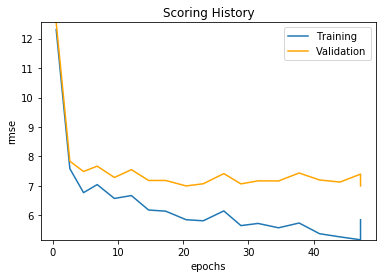

In [125]:
m_DLR_200_epochs.plot()

In [126]:
m_DLR_200_epochs.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2020-01-10 14:18:47,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-01-10 14:18:52,5.275 sec,4400 obs/sec,0.519841,1,18327.0,12.308488,151.498877,8.974514,0.820831,12.552021,157.553243,8.903538,0.837235
2,,2020-01-10 14:19:02,15.573 sec,6706 obs/sec,2.620252,5,92377.0,7.582951,57.501143,4.209257,0.931997,7.835928,61.401768,4.227547,0.936567
3,,2020-01-10 14:19:10,23.117 sec,8059 obs/sec,4.716608,9,166284.0,6.769189,45.821921,3.555150,0.945809,7.486467,56.047181,3.745983,0.942099
4,,2020-01-10 14:19:17,30.110 sec,8917 obs/sec,6.813785,13,240220.0,7.042371,49.594993,4.425715,0.941347,7.669037,58.814136,4.539207,0.939240
5,,2020-01-10 14:19:25,38.241 sec,9686 obs/sec,9.447086,18,333057.0,6.572373,43.196086,4.011061,0.948914,7.284194,53.059485,4.180602,0.945185
6,,2020-01-10 14:19:33,46.211 sec,10209 obs/sec,12.063877,23,425312.0,6.669387,44.480717,3.989103,0.947395,7.549318,56.992196,4.220147,0.941122
7,,2020-01-10 14:19:41,53.969 sec,10632 obs/sec,14.695447,28,518088.0,6.179006,38.180119,3.456218,0.954846,7.182962,51.594937,3.718335,0.946698
8,,2020-01-10 14:19:48,1 min 1.794 sec,10945 obs/sec,17.318792,33,610574.0,6.140456,37.705202,3.089106,0.955408,7.182610,51.589888,3.370714,0.946704
9,,2020-01-10 14:19:57,1 min 10.502 sec,11311 obs/sec,20.455794,39,721169.0,5.849348,34.214878,2.996512,0.959536,6.996922,48.956921,3.314705,0.949424


## The distribution of ArrDelay is very long_tailed

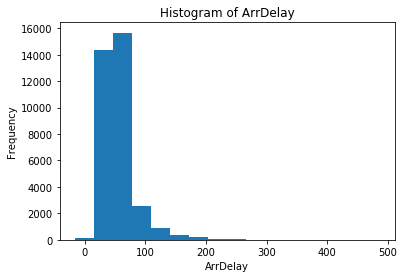

In [128]:
train[y].hist()
# It looks like two exponential decays, try laplace distribution here

In [129]:
m_DLR_laplace = H2ODeepLearningEstimator(variable_importances = True,
                                         epochs = 200,
                                         distribution = "laplace")

In [130]:
%time m_DLR_laplace.train(xWithDep, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 789 ms, sys: 116 ms, total: 905 ms
Wall time: 2min 41s


In [131]:
m_DLR_laplace.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 52.0894455083
RMSE: 7.21730181635
MAE: 3.06242635983
RMSLE: NaN
Mean Residual Deviance: 3.06242635983
